In [73]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [74]:
# Reading data from csv file
data = pd.read_csv('mushrooms.csv')

In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [76]:
# ENCODING CATEGORICAL FEATURES 

In [77]:
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [78]:
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [79]:
# SOME DATA VISUALIZATION TO MAKE SENSE OF THE DATA IN HAND

C:\Users\Abhishek Mohanty\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


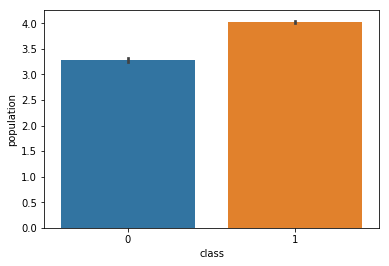

In [80]:
sns.barplot(x='class',y='population',data=data)

In [81]:
#sns.swarmplot(x='class',y='habitat', data=data, color='yellow')
#sns.violinplot(x='class',y='habitat', data=data)

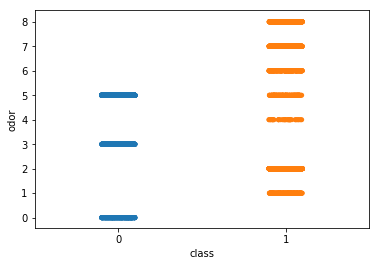

In [82]:
sns.stripplot(x='class',y='odor',jitter=True,data=data)

In [83]:
# Time to check for some correlation between the features

In [84]:
cor = data.corr()

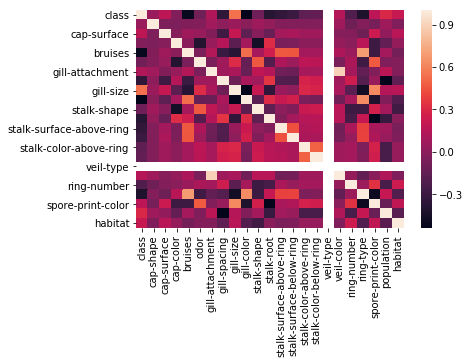

In [85]:
sns.heatmap(cor)

In [86]:
piv = data.pivot_table(index='class',columns='veil-type', values=data)
piv

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-number,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color
veil-type,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
class,,,,,,,,,,,,,,,,,,,,,
0,0.653992,4.581749,3.266160,1.615970,0.954373,6.622624,0.068441,0.285171,1.148289,4.334601,...,1.125475,3.007605,3.201521,6.098859,6.064639,1.498099,0.615970,1.775665,1.798479,1.931559
1,0.159346,4.421859,3.436159,2.055158,0.995403,2.863636,0.567926,0.028601,1.895812,3.940756,...,1.009193,1.522983,4.021450,5.512768,5.504597,0.692543,0.514811,1.359551,1.394280,2.002043


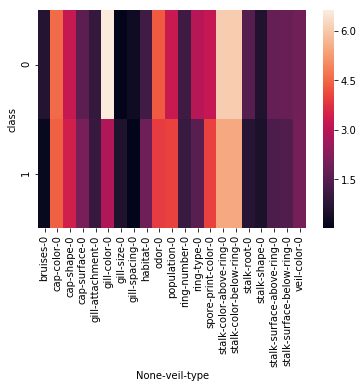

In [87]:
sns.heatmap(piv)
# hard to extract insights from the plot here though :(

In [88]:
# FINALLY, TIME TO TRAIN OUR MODEL!

In [89]:
from xgboost import XGBRegressor

In [90]:
# Separating Featues and Prediction Columns
X = data
y = data['class']
X.drop(['class'], axis=1, inplace=True)

In [91]:
# Breaking off available data into TRAIN and TEST sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [92]:
# Using an ensemble as our ML Model/Algorithm
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [93]:
model.fit(X_train, y_train)

C:\Users\Abhishek Mohanty\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:13:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [94]:
y_pred = model.predict(X_valid)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [96]:
score = mean_absolute_error(y_valid, y_pred)
print('MAE: (MODEL - ExtremeGradientBoost) ', score)

MAE: (MODEL - ExtremeGradientBoost)  0.00525299659559627


In [97]:
accuracy = round(model.score(X_valid, y_valid) * 100, 3) 
print('Model Accuracy: ', accuracy)

Model Accuracy:  99.869
